In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import time
import streamlit as st
import pickle

Loading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("air quality.csv",encoding='ISO-8859-1')
print(df)

Saving air quality.csv to air quality.csv
                 From Date              To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  \
0      2016-07-01 10:00:00  2016-07-01 11:00:00          10.67         39.00   
1      2016-07-01 11:00:00  2016-07-01 12:00:00           2.00         39.00   
2      2016-07-01 12:00:00  2016-07-01 13:00:00            NaN           NaN   
3      2016-07-01 13:00:00  2016-07-01 14:00:00            NaN           NaN   
4      2016-07-01 14:00:00  2016-07-01 15:00:00          20.50         50.00   
...                    ...                  ...            ...           ...   
59145  2023-03-31 19:00:00  2023-03-31 20:00:00          53.00         70.25   
59146  2023-03-31 20:00:00  2023-03-31 21:00:00          58.50         88.50   
59147  2023-03-31 21:00:00  2023-03-31 22:00:00          44.25         80.50   
59148  2023-03-31 22:00:00  2023-03-31 23:00:00          31.25         59.00   
59149  2023-03-31 23:00:00  2023-04-01 00:00:00          26.00         53.00  

Data Processing

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('air quality.csv')

# List of numerical columns (excluding 'BP (mmHg)')
numerical_cols = df.select_dtypes(include=['float64']).columns.tolist()
numerical_cols.remove('BP (mmHg)')

# Impute missing values with the mean for numerical columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute missing values with 0 for 'BP (mmHg)'
df['BP (mmHg)'] = df['BP (mmHg)'].fillna(0)

# Convert 'From Date' and 'To Date' to datetime format
df['From Date'] = pd.to_datetime(df['From Date'])
df['To Date'] = pd.to_datetime(df['To Date'])

# Remove duplicates
df = df.drop_duplicates()

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| From Date           | To Date             | PM2.5 (ug/m3)   | PM10 (ug/m3)   | NO (ug/m3)   | NO2 (ug/m3)   | NOx (ppb)   | NH3 (ug/m3)   | SO2 (ug/m3)   | CO (mg/m3)   | Ozone (ug/m3)   | Benzene (ug/m3)   | Toluene (ug/m3)   | Temp (degree C)   | RH (%)   | WS (m/s)   | WD (deg)   | SR (W/mt2)   | BP (mmHg)   | VWS (m/s)   | Xylene (ug/m3)   | RF (mm)   | AT (degree C)   |
|:--------------------|:--------------------|:----------------|:---------------|:-------------|:--------------|:------------|:--------------|:--------------|:-------------|:----------------|:------------------|:------------------|:------------------|:---------|:-----------|:-----------|:-------------|:------------|:------------|:-----------------|:----------|:----------------|
| 2016-07-01 10:00:00 | 2016-07-01 11:00:00 | 10.67           | 39             | 17.67        | 39.2          | 32.33       | 7.07          | 6.6           | 0.48         | 14.5            | 1                 | 4.63              | 33.43    

Exploratory Data Analysis

In [ ]:
# 1. Summary Statistics for Numerical Features
print("\n--- Summary Statistics for Numerical Features ---")
print(df.describe())


--- Summary Statistics for Numerical Features ---
                 From Date              To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  \
count                59150                59150   59150.000000  59150.000000   
mean   2019-11-15 16:30:00  2019-11-15 17:30:00      29.718423     58.531252   
min    2016-07-01 10:00:00  2016-07-01 11:00:00       0.250000      1.000000   
25%    2018-03-09 13:15:00  2018-03-09 14:15:00      14.000000     35.500000   
50%    2019-11-15 16:30:00  2019-11-15 17:30:00      26.750000     57.250000   
75%    2021-07-23 19:45:00  2021-07-23 20:45:00      40.500000     76.000000   
max    2023-03-31 23:00:00  2023-04-01 00:00:00     449.500000    929.000000   
std                    NaN                  NaN      20.475268     31.074685   

         NO (ug/m3)   NO2 (ug/m3)     NOx (ppb)   NH3 (ug/m3)   SO2 (ug/m3)  \
count  59150.000000  59150.000000  59150.000000  59150.000000  59150.000000   
mean      13.077963     39.195409     31.171453     10.057892      5.7

Distribution Plots (Histograms)


--- Distribution Plots (Histograms) ---


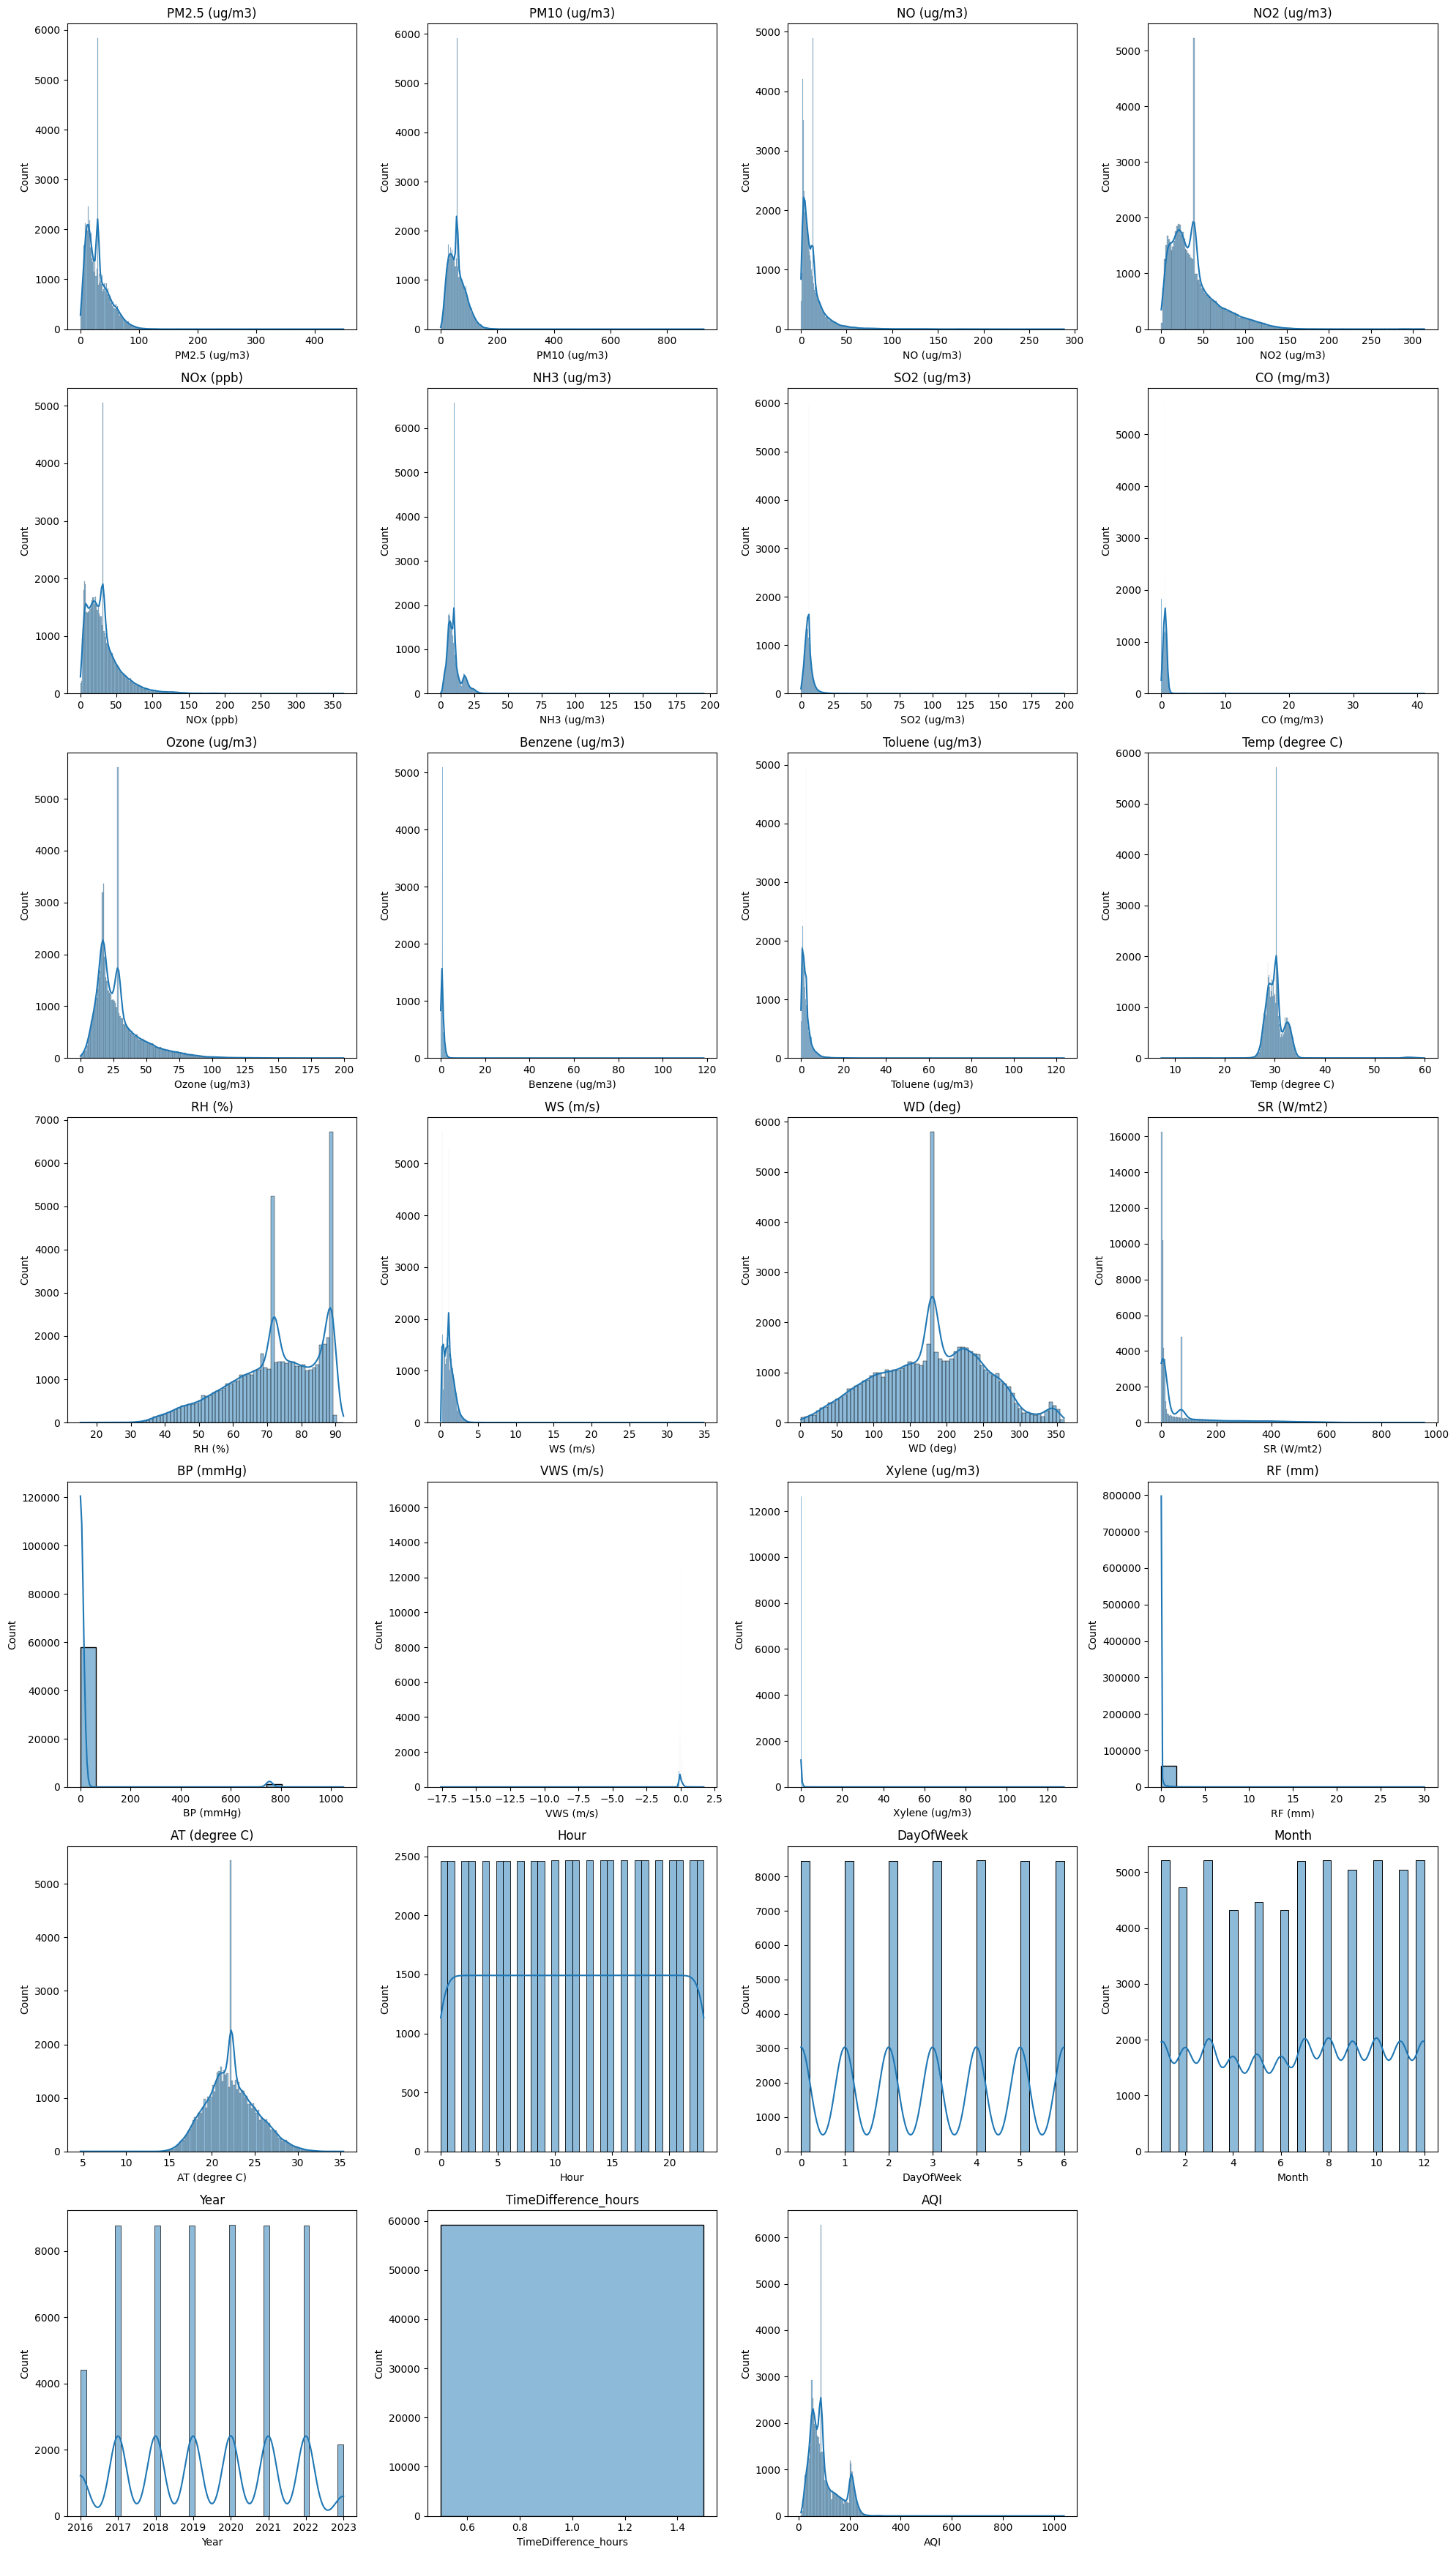


--- Time Series Plots for Key Pollutants ---


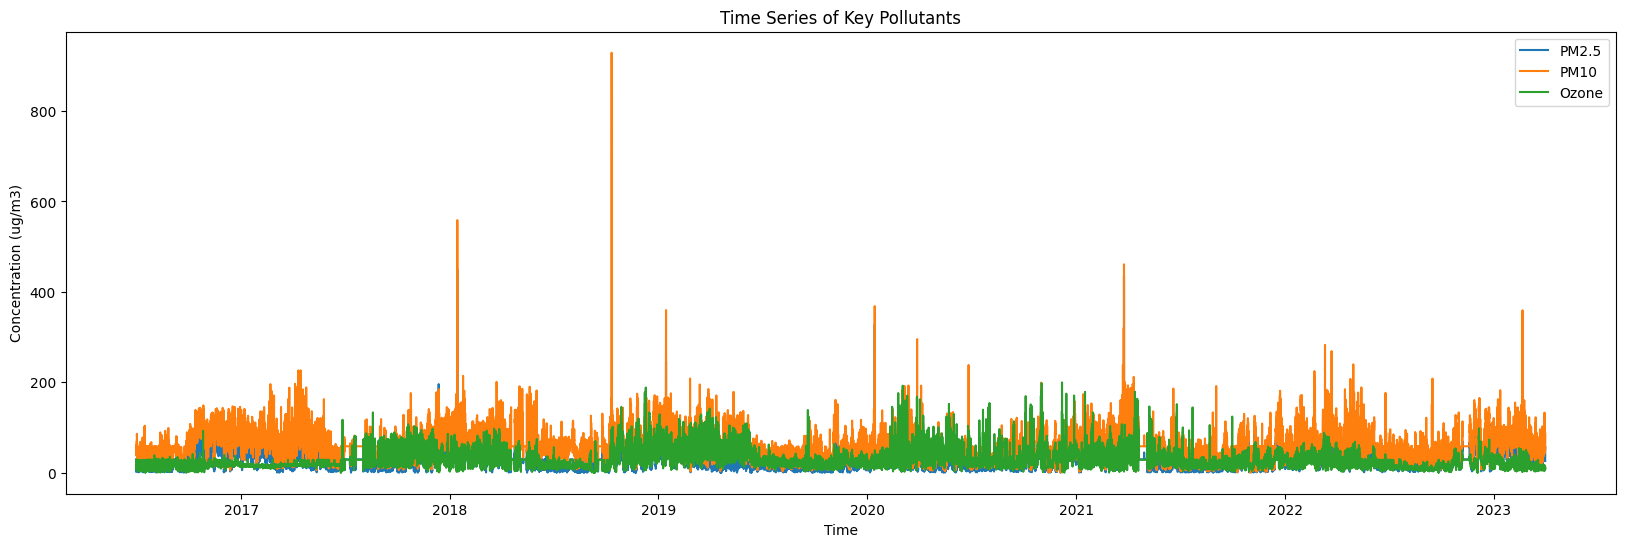


--- Correlation Matrix ---


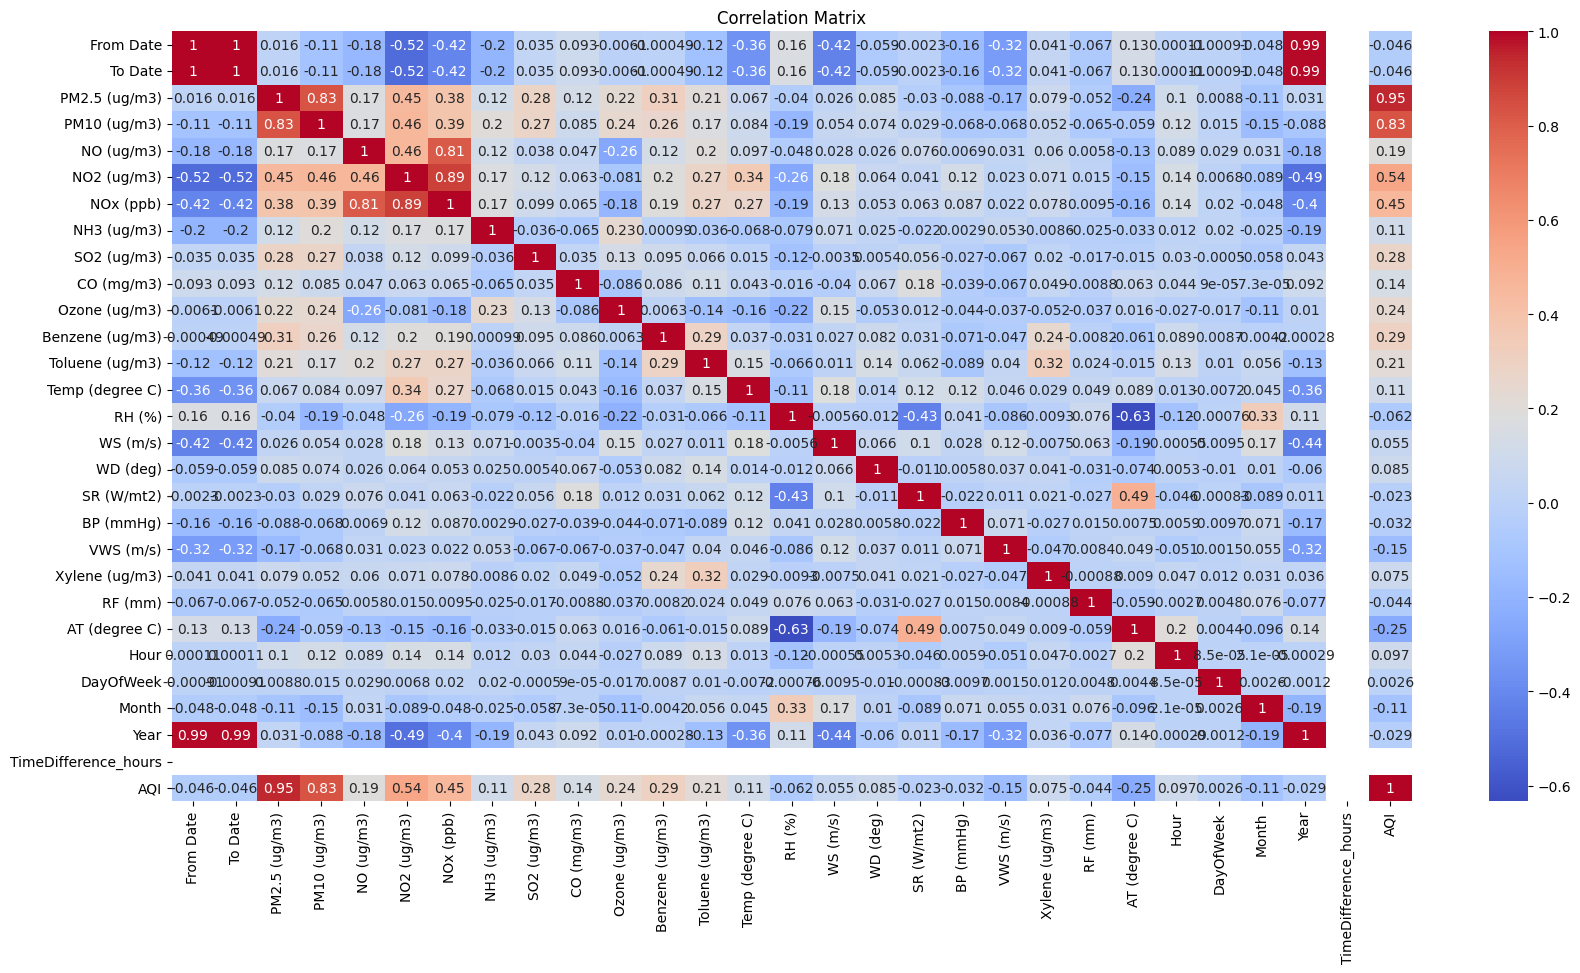

In [ ]:
print("\n--- Distribution Plots (Histograms) ---")
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Adjust the number of columns in the subplot grid for better layout
cols_per_row = 4
num_rows = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure height dynamically

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()

# 3. Time Series Plots for Key Pollutants (PM2.5, PM10, Ozone)
print("\n--- Time Series Plots for Key Pollutants ---")
plt.figure(figsize=(20, 6))
plt.plot(df['From Date'], df['PM2.5 (ug/m3)'], label='PM2.5')
plt.plot(df['From Date'], df['PM10 (ug/m3)'], label='PM10')
plt.plot(df['From Date'], df['Ozone (ug/m3)'], label='Ozone')
plt.xlabel('Time')
plt.ylabel('Concentration (ug/m3)')
plt.title('Time Series of Key Pollutants')
plt.legend()
plt.show()

# 4. Correlation Matrix
print("\n--- Correlation Matrix ---")
plt.figure(figsize=(20, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Feature Engineering

In [ ]:
import numpy as np

# Extract features from 'From Date'
df['Hour'] = df['From Date'].dt.hour
df['DayOfWeek'] = df['From Date'].dt.dayofweek
df['Month'] = df['From Date'].dt.month
df['Year'] = df['From Date'].dt.year

# Calculate time difference in hours
df['TimeDifference_hours'] = (df['To Date'] - df['From Date']).dt.total_seconds() / 3600

# Define AQI calculation function
def calculate_aqi(row):
    pm25 = row['PM2.5 (ug/m3)']
    pm10 = row['PM10 (ug/m3)']
    no2 = row['NO2 (ug/m3)']
    co = row['CO (mg/m3)']
    o3 = row['Ozone (ug/m3)']

    aqi_values = []

    # Calculate AQI for each pollutant
    if 0 <= pm25 <= 12:
        aqi_pm25 = (50/12) * pm25
    elif 12 < pm25 <= 35.4:
        aqi_pm25 = ((100-50) / (35.4 - 12.1)) * (pm25 - 12.1) + 50
    elif 35.4 < pm25 <= 55.4:
        aqi_pm25 = ((200-100) / (55.4 - 35.5)) * (pm25 - 35.5) + 100
    elif 55.4 < pm25 <= 150.4:
        aqi_pm25 = ((300-200) / (150.4 - 55.5)) * (pm25 - 55.5) + 200
    elif 150.4 < pm25 <= 250.4:
        aqi_pm25 = ((400-300) / (250.4 - 150.5)) * (pm25 - 150.5) + 300
    elif pm25 > 250.4:
        aqi_pm25 = ((500-400) / (350.4 - 250.5)) * (pm25 - 250.5) + 400
    else:
        aqi_pm25 = 0

    aqi_values.append(aqi_pm25)

    if 0 <= pm10 <= 54:
        aqi_pm10 = (50/54) * pm10
    elif 54 < pm10 <= 154:
        aqi_pm10 = ((100-50) / (154 - 55)) * (pm10 - 55) + 50
    elif 154 < pm10 <= 254:
        aqi_pm10 = ((200-100) / (254 - 155)) * (pm10 - 155) + 100
    elif 254 < pm10 <= 354:
        aqi_pm10 = ((300-200) / (354 - 255)) * (pm10 - 255) + 200
    elif 354 < pm10 <= 424:
        aqi_pm10 = ((400-300) / (424 - 355)) * (pm10 - 355) + 300
    elif pm10 > 424:
        aqi_pm10 = ((500-400) / (504 - 425)) * (pm10 - 425) + 400
    else:
        aqi_pm10 = 0

    aqi_values.append(aqi_pm10)

    if 0 <= no2 <= 40:
        aqi_no2 = (50/40) * no2
    elif 40 < no2 <= 80:
        aqi_no2 = ((100-50) / (80 - 41)) * (no2 - 41) + 50
    elif 80 < no2 <= 180:
        aqi_no2 = ((200-100) / (180 - 81)) * (no2 - 81) + 100
    elif 180 < no2 <= 280:
        aqi_no2 = ((300-200) / (280 - 181)) * (no2 - 181) + 200
    elif 280 < no2 <= 400:
        aqi_no2 = ((400-300) / (400 - 281)) * (no2 - 281) + 300
    elif no2 > 400:
        aqi_no2 = ((500-400) / (500 - 401)) * (no2 - 401) + 400
    else:
        aqi_no2 = 0

    aqi_values.append(aqi_no2)

    if 0 <= co <= 4.4:
        aqi_co = (50/4.4) * co
    elif 4.4 < co <= 12.4:
        aqi_co = ((100-50) / (12.4 - 4.5)) * (co - 4.5) + 50
    elif 12.4 < co <= 22.4:
        aqi_co = ((200-100) / (22.4 - 12.5)) * (co - 12.5) + 100
    elif 22.4 < co <= 30.4:
        aqi_co = ((300-200) / (30.4 - 22.5)) * (co - 22.5) + 200
    elif 30.4 < co <= 40.4:
        aqi_co = ((400-300) / (40.4 - 30.5)) * (co - 30.5) + 300
    elif co > 40.4:
        aqi_co = ((500-400) / (50.4 - 40.5)) * (co - 40.5) + 400
    else:
        aqi_co = 0

    aqi_values.append(aqi_co)

    if 0 <= o3 <= 50:
        aqi_o3 = (50/50) * o3
    elif 50 < o3 <= 100:
        aqi_o3 = ((100-50) / (100 - 51)) * (o3 - 51) + 50
    elif 100 < o3 <= 168:
        aqi_o3 = ((200-100) / (168 - 101)) * (o3 - 101) + 100
    elif 168 < o3 <= 208:
        aqi_o3 = ((300-200) / (208 - 169)) * (o3 - 169) + 200
    elif 208 < o3 <= 748:
        aqi_o3 = ((400-300) / (748 - 209)) * (o3 - 209) + 300
    elif o3 > 748:
        aqi_o3 = ((500-400) / (1000 - 749)) * (o3 - 749) + 400
    else:
        aqi_o3 = 0

    aqi_values.append(aqi_o3)

    return max(aqi_values)

# Apply the function to calculate AQI
df['AQI'] = df.apply(calculate_aqi, axis=1)

# Basic data cleaning (handle missing values - using mean imputation for numerical columns)
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())

# Select features (X) and target variable (y)
features = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)',
            'Hour', 'DayOfWeek', 'Month', 'Year', 'TimeDifference_hours']  # Include engineered features
X = df[features]
y = df['AQI']  # Target variable is AQI

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Data Modelling

In [ ]:
# --- Model Building ---
model_training_times = {}
model_predictions = {}
model_evaluation_metrics = {}

# 1. Linear Regression (Baseline Model)
start_time = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
training_time = time.time() - start_time
model_training_times['Linear Regression'] = training_time

y_pred_lr = lr_model.predict(X_test)
model_predictions['Linear Regression'] = y_pred_lr

# 2. Random Forest Regressor
start_time = time.time()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
training_time = time.time() - start_time
model_training_times['Random Forest'] = training_time

y_pred_rf = rf_model.predict(X_test)
model_predictions['Random Forest'] = y_pred_rf

# 3. Gradient Boosting Regressor (XGBoost)
start_time = time.time()
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
training_time = time.time() - start_time
model_training_times['Gradient Boosting'] = training_time

y_pred_gb = gb_model.predict(X_test)
model_predictions['Gradient Boosting'] = y_pred_gb

# 4. Neural Network Regressor
start_time = time.time()
nn_model = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', random_state=42, max_iter=200)
nn_model.fit(X_train, y_train)
training_time = time.time() - start_time
model_training_times['Neural Network'] = training_time

y_pred_nn = nn_model.predict(X_test)
model_predictions['Neural Network'] = y_pred_nn

# --- Model Evaluation ---
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'Model': model_name, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

evaluation_results = []
for model_name, y_pred in model_predictions.items():
    results = evaluate_model(y_test, y_pred, model_name)
    evaluation_results.append(results)

model_evaluation_metrics = pd.DataFrame(evaluation_results)

print("\n--- Model Training Times ---")
print(model_training_times)

print("\n--- Model Evaluation Metrics ---")
print(model_evaluation_metrics.to_markdown(index=False, numalign="left", stralign="left"))



NameError: name 'X_train' is not defined

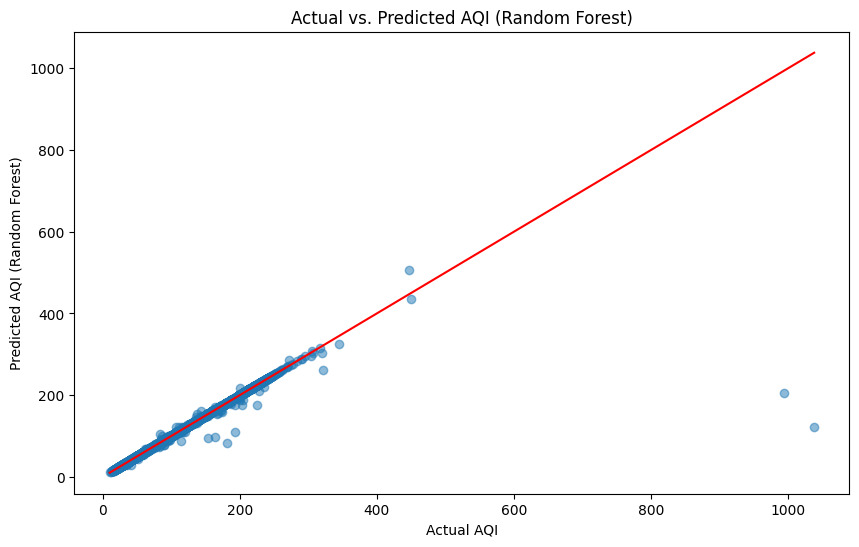

In [ ]:
# --- Visualization (Example: Predicted vs. Actual for Random Forest) ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model_predictions['Random Forest'], alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for perfect predictions
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI (Random Forest)')
plt.title('Actual vs. Predicted AQI (Random Forest)')
plt.show()